# Data Scientist Associate Practical Exam Submission

Use this template to complete your analysis and write up your summary for submission.


# Electric Moped

In [300]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [301]:
emo = pd.read_csv('electric_bike_ratings_2212.csv')
emo

,owned,make_model,review_month,web_browser,reviewer_age,primary_use,value_for_money,overall_rating
0,1,Nielah-Eyden,Oct,Chrome,23,Commuting,5/10,18.62
1,0,Nielah-Keetra,Jun,NaN,24,Commuting,4/10,15.55
2,0,Lunna-Keetra,23-Oct,Chrome,28,Commuting,5/10,12.76
3,1,Hoang-Keetra,07-Nov,IE,41,Leisure,5/10,17.07
4,1,Lunna-Keetra,16-Sep,Chrome,33,Leisure,5/10,12.29
...,...,...,...,...,...,...,...,...
1495,1,Nielah-Eyden,18-May,Chrome,-,Leisure,6/10,18.76
1496,1,Nielah-Eyden,11-Mar,NaN,39,Commuting,5/10,18.56
1497,1,Nielah-Eyden,10-Nov,Chrome,21,Commuting,8/10,20.22
1498,0,Nielah-Eyden,Nov,Safari,45,Commuting,3/10,18.51


## Task 1 : Data Cleaning for every column in the data.
* State whether the values match the description given below.
    1. owned : Nominal. Whether the reviewer owns the moped (1) or not (0).Missing values should be removed.
    2. make_model : Nominal. The make and model of the bike, one of six possible values
       (Nielah-Eyden, Nielah-Keetra, Lunna-Keetra, Hoang-Keetra,Lunna-Eyden, Hoang-Eyden).
       Replace missing values with “unknown”.
    3. review_month : Nominal. The month the review was given in English short format (Jan,Feb, Mar, Apr etc.).
       Replace missing values with “unknown”.
    4. web_browser : Nominal. Web browser used by the user leaving the review, one of Chrome, IE, Firefox, Safari,        Android, Opera. Replace missing values with “unknown”.
    5. reviewer_age : Discrete. Age of the user leaving the review. Integer values from 16. 
       Replace missing values  with the average age.
    7. primary_use : Nominal. The main reason the user reports that they use the bike for. One of Commuting or            Leisure. Replace missing values with “unknown”.
    8. value_for_money : Discrete. Rating given by the user on value for money of the bike. Rating from 1 to 10.
       Replace missing values with 0.
    9. overall_rating : Continuous. Total rating score after combining multiple rating scores. Continuous values          from 0 to 25 are possible. Replace missing values with the average rating
* State the number of missing values in the column
* Describe what you did to make values match the description if they did not match.

In [302]:
emo.info()
emo.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   owned            1500 non-null   int64  
 1   make_model       1500 non-null   object 
 2   review_month     1500 non-null   object 
 3   web_browser      1350 non-null   object 
 4   reviewer_age     1500 non-null   object 
 5   primary_use      1500 non-null   object 
 6   value_for_money  1500 non-null   object 
 7   overall_rating   1500 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 93.9+ KB


owned                0
make_model           0
review_month         0
web_browser        150
reviewer_age         0
primary_use          0
value_for_money      0
overall_rating       0
dtype: int64

In [303]:
owned = emo['owned'].value_counts()
print('owned column')
print(owned)
print()

model = emo['make_model'].value_counts()
print('make_model column')
print(model)
print()

month = emo['review_month'].unique()
print('There is no missing value in "review_month" column.')
print(month)
print()

# remove day and '-' characters in ['review_month']
chars_to_remove = ['-', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
cols_to_clean = ['review_month']
for col in cols_to_clean :
    for char in chars_to_remove : 
        emo[col] = emo[col].apply(lambda x : x.replace(char, ''))
# reorder month for creating prediction model.
emo['review_month'] = emo['review_month'].astype('category')
emo['review_month'] = emo['review_month'].cat.reorder_categories(new_categories = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], ordered = True)



emo['web_browser'] = emo['web_browser'].fillna('unknown')
browser = emo['web_browser'].value_counts()
print('There was 150 null values in "web_browser column" replaced with "unknown" string.')
print(browser)
print()



owned column
1    890
0    610
Name: owned, dtype: int64

make_model column
Nielah-Eyden     652
Lunna-Eyden      329
Lunna-Keetra     178
Hoang-Keetra     124
Hoang-Eyden      124
Nielah-Keetra     93
Name: make_model, dtype: int64

There is no missing value in "review_month" column.
['Oct' 'Jun' '23-Oct' '07-Nov' '16-Sep' '26-Aug' '01-Mar' '15-Mar'
 '09-Mar' 'Jul' '10-Nov' 'Mar' 'Apr' 'Sep' '27-Dec' '11-Nov' '07-Dec'
 'Feb' 'Jan' '06-Jun' '12-Jul' '02-Aug' '23-Feb' '27-Jul' '26-Nov'
 '30-Apr' '31-Jul' '22-Nov' '05-Sep' '05-Dec' '21-Jul' '15-Nov' '07-Jun'
 '20-May' '23-Sep' '10-Sep' '19-Oct' '28-Oct' '08-Apr' '14-Feb' '28-Nov'
 '28-Feb' '28-Jul' '12-Apr' '25-Apr' '25-Oct' '08-Jul' '29-Mar' '22-Sep'
 '26-Jun' '24-May' '12-Mar' '15-Feb' '28-Aug' 'May' '16-Jun' '02-Jul'
 '06-Feb' '21-Jun' 'Nov' '21-Apr' '19-Jul' '31-May' '11-Aug' '14-Mar'
 '12-Dec' '02-Apr' '23-Aug' '11-Feb' '24-Aug' '03-Jun' '01-Apr' '24-Nov'
 'Dec' '26-Mar' '22-Oct' '22-Jan' '17-Mar' '05-Oct' '20-Mar' '13-Jul'
 '03-Oct

In [304]:
# turn str in 'review_age' column into integer and turn nan values into average age
emo['reviewer_age'] = emo['reviewer_age'].fillna('-')

age = []
for i in emo['reviewer_age'] : 
    if i != '-' :
        age.append(int(i))
    else : 
        age.append(None)

total = 0
count = 0
for i in age : 
    if i is not None : 
        total = total + i
        count = count + 1
    else :
        None
average = total // count

emo['reviewer_age'] = age
emo['reviewer_age'] = emo['reviewer_age'].fillna(average)
emo['reviewer_age'] = emo['reviewer_age'].astype('int')
emo        


,owned,make_model,review_month,web_browser,reviewer_age,primary_use,value_for_money,overall_rating
0,1,Nielah-Eyden,Oct,Chrome,23,Commuting,5/10,18.62
1,0,Nielah-Keetra,Jun,unknown,24,Commuting,4/10,15.55
2,0,Lunna-Keetra,Oct,Chrome,28,Commuting,5/10,12.76
3,1,Hoang-Keetra,Nov,IE,41,Leisure,5/10,17.07
4,1,Lunna-Keetra,Sep,Chrome,33,Leisure,5/10,12.29
...,...,...,...,...,...,...,...,...
1495,1,Nielah-Eyden,May,Chrome,32,Leisure,6/10,18.76
1496,1,Nielah-Eyden,Mar,unknown,39,Commuting,5/10,18.56
1497,1,Nielah-Eyden,Nov,Chrome,21,Commuting,8/10,20.22
1498,0,Nielah-Eyden,Nov,Safari,45,Commuting,3/10,18.51


In [305]:
use = emo['primary_use'].value_counts()
print('There is no missing value in "primary_use" column.')
print(use)
print()

value = emo['value_for_money'].value_counts()
print('There is no missing value in "value_for_money" column.')
print(value)

# turn 'value_for_money' into ordinal data
emo['value_for_money'] = emo['value_for_money'].str.replace('/10', '')
emo['value_for_money'] = emo['value_for_money'].astype(int)
emo['value_for_money'] = emo['value_for_money'] / 10

print('From "emo.isnull().sum()", There is nan value in "overall rating" column.')
min_rating = emo['overall_rating'].min()
max_rating = emo['overall_rating'].max()
print('There are overall rating from {} to {}.'.format(min_rating, max_rating))

There is no missing value in "primary_use" column.
Commuting    1095
Leisure       405
Name: primary_use, dtype: int64

There is no missing value in "value_for_money" column.
5/10     387
6/10     323
4/10     315
3/10     183
7/10     167
2/10      53
8/10      52
1/10      11
9/10       8
10/10      1
Name: value_for_money, dtype: int64
From "emo.isnull().sum()", There is nan value in "overall rating" column.
There are overall rating from 11.69 to 22.76.


## Task 2 : Data visualization
* State which category of the variable owned has the most number of observations.
* Explain whether the observations are balanced across categories of the variable owned.


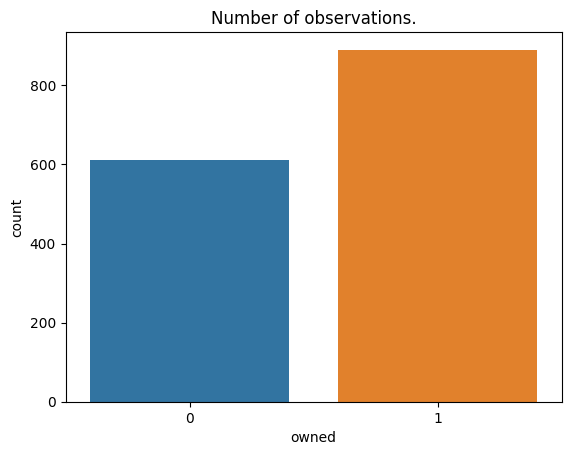

The relative ratio of each owned category.
1    0.593333
0    0.406667
Name: owned, dtype: float64


In [306]:
sns.countplot(data = emo, x = 'owned')
plt.title('Number of observations.')
plt.show()

owned_relative = emo['owned'].value_counts(normalize = True)
print('The relative ratio of each owned category.')
print(owned_relative)



## Task 3 : Describe the distribution of the overall rating across the possible values. Your answer must include a visualization that shows the distribution.


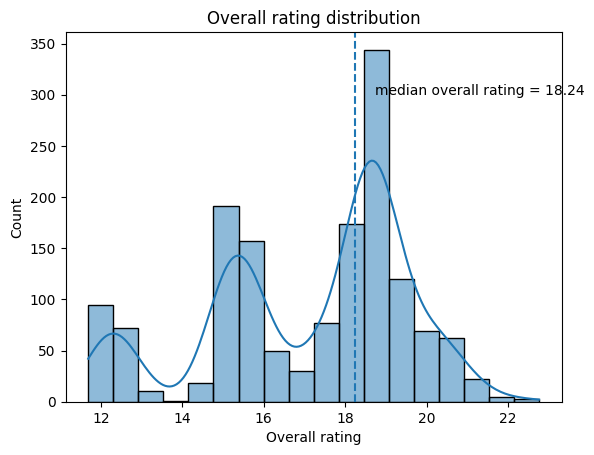

count    1500.000000
mean       17.138907
std         2.445566
min        11.690000
25%        15.320000
50%        18.240000
75%        18.840000
max        22.760000
Name: overall_rating, dtype: float64


In [307]:
sns.histplot(data = emo, x = 'overall_rating', kde = True)
plt.xlabel('Overall rating')
plt.title('Overall rating distribution')
plt.axvline(emo['overall_rating'].median(), linestyle = '--')
plt.text(emo['overall_rating'].median() + 0.5, 300, s = 'median overall rating = {}'.format(emo['overall_rating'].median()))
plt.show()

print(emo['overall_rating'].describe())

## Task 4 : Describe the relationship between ownership and overall rating. Your answer must include a visualization to demonstrate the relationship.

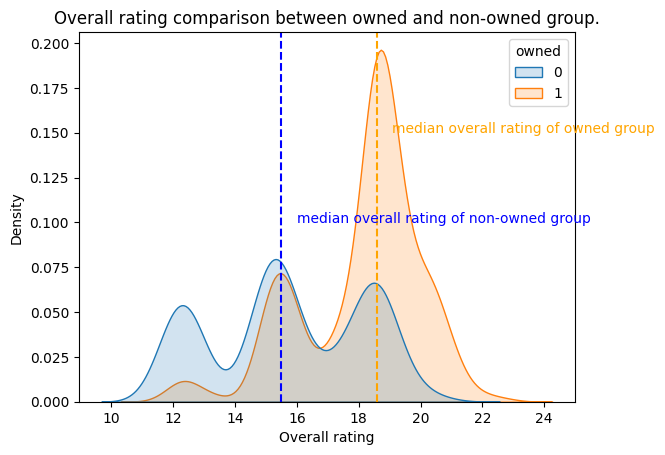

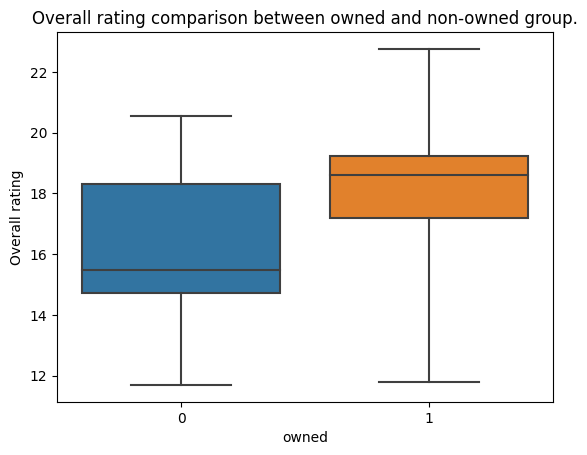

There is significant difference of overall rating between owned and non-owned group.
Mean difference : 3.0999999999999996, 95%Confidential interval [2.8693420085151775, 3.330657991484822], pvalue : 5.705733295639923e-76


In [308]:
sns.kdeplot(data = emo, x = 'overall_rating', hue = 'owned', fill = True, alpha = 0.2)
plt.title('Overall rating comparison between owned and non-owned group.')
plt.xlabel('Overall rating')
plt.axvline(emo[emo['owned'] == 0]['overall_rating'].median(), linestyle = '--', color = 'blue')
plt.axvline(emo[emo['owned'] == 1]['overall_rating'].median(), linestyle = '--', color = 'orange')
plt.text(emo[emo['owned'] == 0]['overall_rating'].median() + 0.5, 0.100, s = 'median overall rating of non-owned group', color = 'blue')
plt.text(emo[emo['owned'] == 1]['overall_rating'].median() + 0.5, 0.150, s = 'median overall rating of owned group', color = 'orange')
plt.show()

sns.boxplot(data = emo, x = 'owned', y = 'overall_rating', whis = [0, 100])
plt.title('Overall rating comparison between owned and non-owned group.')
plt.ylabel('Overall rating')
plt.show()

# hypothesis testing for non-normally distributed data
class hypothesis() : 
    def test(self, group1, group2, tailed = 'two-tailed', CI = 0.95) :
        self.alpha = 1 - CI
        self.z_alpha = stats.norm.ppf(1-(self.alpha/2))
        self.diff = group1.median() - group2.median()
        self.std_error = np.sqrt((np.var(group1)/len(group1)) + (np.var(group2)/len(group2)))
        self.CI_low = self.diff - (self.z_alpha * self.std_error)
        self.CI_high = self.diff + (self.z_alpha * self.std_error)
        self.stat, self.pvalue = stats.mannwhitneyu(group1, group2)
        return self.diff, [self.CI_low, self.CI_high], self.pvalue
study = hypothesis()
mean_diff, CI, pvalue = study.test(emo[emo['owned'] == 1]['overall_rating'], emo[emo['owned'] == 0]['overall_rating'],CI = 0.95)
print('There is significant difference of overall rating between owned and non-owned group.')
print('Mean difference : {}, 95%Confidential interval {}, pvalue : {}'.format(mean_diff, CI, pvalue))

## Task 5 : The business wants to predict whether a review came from an owner or not using the data provided. State the type of machine learning problem that this is (regression/classification/clustering).


In [309]:
# Answer : 
    # If the business wants to predict ownership from this provided data, Multiple logistic regression can be appropiate machine learning model for this objective.
    

In [310]:
print("Final cleaned data before creating the prediction model")
print()
emo

Final cleaned data before creating the prediction model



,owned,make_model,review_month,web_browser,reviewer_age,primary_use,value_for_money,overall_rating
0,1,Nielah-Eyden,Oct,Chrome,23,Commuting,0.5,18.62
1,0,Nielah-Keetra,Jun,unknown,24,Commuting,0.4,15.55
2,0,Lunna-Keetra,Oct,Chrome,28,Commuting,0.5,12.76
3,1,Hoang-Keetra,Nov,IE,41,Leisure,0.5,17.07
4,1,Lunna-Keetra,Sep,Chrome,33,Leisure,0.5,12.29
...,...,...,...,...,...,...,...,...
1495,1,Nielah-Eyden,May,Chrome,32,Leisure,0.6,18.76
1496,1,Nielah-Eyden,Mar,unknown,39,Commuting,0.5,18.56
1497,1,Nielah-Eyden,Nov,Chrome,21,Commuting,0.8,20.22
1498,0,Nielah-Eyden,Nov,Safari,45,Commuting,0.3,18.51


## Task 6 : Fit a baseline model to predict whether a review came from an owner or not using the data provided. You must include your code.


In [311]:
# Create dummy for nominal data : ['make_model', 'review_month', 'web_browser', 'primary_use']
# independent variable or target : ['owned']
dummy = pd.get_dummies(emo[['make_model', 'review_month', 'web_browser', 'primary_use']])
emo_dummy = pd.concat([emo, dummy], axis = 1)
emo_dummy = emo_dummy.drop(['make_model', 'review_month', 'web_browser', 'primary_use'], axis = 1)
print(emo_dummy.columns)
emo_dummy



Index(['owned', 'reviewer_age', 'value_for_money', 'overall_rating',
       'make_model_Hoang-Eyden', 'make_model_Hoang-Keetra',
       'make_model_Lunna-Eyden', 'make_model_Lunna-Keetra',
       'make_model_Nielah-Eyden', 'make_model_Nielah-Keetra',
       'review_month_Jan', 'review_month_Feb', 'review_month_Mar',
       'review_month_Apr', 'review_month_May', 'review_month_Jun',
       'review_month_Jul', 'review_month_Aug', 'review_month_Sep',
       'review_month_Oct', 'review_month_Nov', 'review_month_Dec',
       'web_browser_Android', 'web_browser_Chrome', 'web_browser_Firefox',
       'web_browser_IE', 'web_browser_Opera', 'web_browser_Safari',
       'web_browser_unknown', 'primary_use_Commuting', 'primary_use_Leisure'],
      dtype='object')


,owned,reviewer_age,value_for_money,overall_rating,make_model_Hoang-Eyden,make_model_Hoang-Keetra,make_model_Lunna-Eyden,make_model_Lunna-Keetra,make_model_Nielah-Eyden,make_model_Nielah-Keetra,review_month_Jan,review_month_Feb,review_month_Mar,review_month_Apr,review_month_May,review_month_Jun,review_month_Jul,review_month_Aug,review_month_Sep,review_month_Oct,review_month_Nov,review_month_Dec,web_browser_Android,web_browser_Chrome,web_browser_Firefox,web_browser_IE,web_browser_Opera,web_browser_Safari,web_browser_unknown,primary_use_Commuting,primary_use_Leisure
0,1,23,0.5,18.62,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
1,0,24,0.4,15.55,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
2,0,28,0.5,12.76,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
3,1,41,0.5,17.07,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
4,1,33,0.5,12.29,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1,32,0.6,18.76,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1496,1,39,0.5,18.56,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1497,1,21,0.8,20.22,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
1498,0,45,0.3,18.51,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0


In [312]:
# Logistic regression
X = emo_dummy[['reviewer_age', 'value_for_money', 'overall_rating',
      'make_model_Hoang-Eyden', 'make_model_Hoang-Keetra',
      'make_model_Lunna-Eyden', 'make_model_Lunna-Keetra',
      'make_model_Nielah-Eyden', 'make_model_Nielah-Keetra',
      'review_month_Jan', 'review_month_Feb', 'review_month_Mar',
      'review_month_Apr', 'review_month_May', 'review_month_Jun',
      'review_month_Jul', 'review_month_Aug', 'review_month_Sep',
      'review_month_Oct', 'review_month_Nov', 'review_month_Dec',
      'web_browser_Android', 'web_browser_Chrome', 'web_browser_Firefox',
      'web_browser_IE', 'web_browser_Opera', 'web_browser_Safari',
      'web_browser_unknown', 'primary_use_Commuting', 'primary_use_Leisure']]
Y = emo_dummy['owned']

X_train, X_test, Y_train, Y_test = train_test_split(X.values, Y.values, test_size = 0.2, random_state = 123)
model = LogisticRegression()
model.fit(X_train, Y_train)
# test for accuracy
Y_predict_test = model.predict(X_test)

confusionmatrix_LG= confusion_matrix(Y_test, Y_predict_test)
accuracy_LG = accuracy_score(Y_test, Y_predict_test)
print('Accuracy score of Multiple logistic regression model : ', accuracy_LG)
print('Confusion matrix : ')
confusionmatrix_LG

Accuracy score of Multiple logistic regression model :  0.7566666666666667
Confusion matrix : 


array([[ 77,  49],
       [ 24, 150]])

## Task 7 : Fit a comparison model to predict whether a review came from an owner or not using the data provided. You must include your code.

In [313]:
# Decision tree classifier

X_train, X_test, Y_train, Y_test = train_test_split(X.values, Y.values, test_size = 0.2, random_state = 123)
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
# test for accuracy
Y_predict_test = model.predict(X_test)

confusionmatrix_DT = confusion_matrix(Y_test, Y_predict_test)
accuracy_DT = accuracy_score(Y_test, Y_predict_test)
print('Accuracy score of Decision tree classifier : ', accuracy_DT)
print('Confusion matrix : ')
confusionmatrix_DT


Accuracy score of Decision tree classifier :  0.6766666666666666
Confusion matrix : 


array([[ 81,  45],
       [ 52, 122]])

## Task 8 : Explain why you chose the two models used in parts 6 and 7.

In [314]:
# Multiple logistic regression
    # Logistic Regression is a statistical model that predicts the probability of a binary outcome based on input features.
    # It models the relationship between the predictor variables and the probability of the binary outcome using a logistic function.
    # Multiple Logistic Regression allows for the inclusion of multiple predictor variables, each with their own coefficient estimates.
    # It estimates the probability of the binary outcome and makes predictions by applying a threshold to the estimated probabilities.
    
# Decision tree classifier
    # Decision Tree Classifier is a non-parametric model that uses a tree-like structure to make predictions.
    # It splits the data based on the values of input features and creates decision rules at each node of the tree.
    # Decision Tree Classifier can handle both categorical and numerical input features.
    # It predicts the binary outcome by following the decision rules down the tree until reaching a leaf node, which represents the predicted class.

## Task 9 : Compare the performance of the two models used in parts 6 and 7, using any method suitable for the type of model. You must include your code.

In [315]:
# I included the code in Task 6 and Task 7.

# I used the confusion matrix and accuracy score to compare the prediction of binary categorical values between the two models.
    # Multiple logistic regression : accuracy score = 0.7566
print('Accuracy score of Multiple logistic regression model : ', accuracy_LG)
    # Decision tree classifier
print('Accuracy score of Decision tree classifier : ', accuracy_DT)



Accuracy score of Multiple logistic regression model :  0.7566666666666667
Accuracy score of Decision tree classifier :  0.6766666666666666


## Task 10 : Explain which model performs better and why.

In [316]:
# Linearity assumption: Multiple logistic regression assumes a linear relationship between the independent variables and the log-odds of the dependent variable. If the relationship between the variables is more linear in nature, the logistic regression model may be better suited to capture this relationship, leading to higher accuracy.

# Feature importance : Decision trees consider all features and make decisions based on their importance in the tree structure. If there are irrelevant or less important features in the dataset, the decision tree may struggle to find the most relevant features for accurate predictions. On the other hand, multiple logistic regression allows for explicit feature selection and can exclude less informative variables from the model, focusing only on the significant predictors.

# Overfitting: Decision trees have a tendency to overfit the training data, especially when the tree becomes too complex. This means that the decision tree may perform well on the training data but generalize poorly to new, unseen data. Multiple logistic regression, on the other hand, is less prone to overfitting and may provide better generalization to unseen data.